# COMP 551 Assignment 3 - Modified VGG Classifier

In [1]:
# basic
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LeakyReLU, ZeroPadding2D,Convolution2D
from keras.utils import plot_model, to_categorical
from keras.callbacks import History
from keras.optimizers import Nadam, Adam, SGD
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras import backend as K
from keras import regularizers

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

C:\Users\Pasha\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def cnn():
    # create model
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(128,128,1)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # Compile
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = cnn()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 130, 130, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 130, 130, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        18496     
__________

In [4]:
train_labels = pd.read_csv('train_max_y.csv')
train_images = pd.read_pickle('train_max_x')
test_images = pd.read_pickle('test_max_x')

train_images = np.where(train_images<250, 0, train_images)
test_images = np.where(test_images<250, 0, test_images)

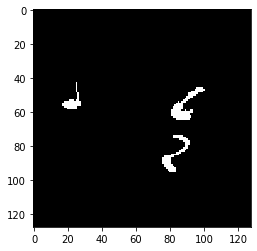

In [14]:
# X = np.where(train_images<250, 0, 255)
# plt.imshow(X[0], cmap='gray')
# plt.show()

In [9]:
# resized_imgs = []

# for img in train_images: 
#     resized = cv2.resize(img, (64, 64))
#     resized_imgs.append(resized)
    
# # Split the data into a training and test set

# X_train, X_test, y_train, y_test = train_test_split(resized_imgs, train_labels['Label'], test_size=0.30, random_state=0, stratify=train_labels['Label'])
# X_train = np.array(X_train)/255
# X_test = np.array(X_test)/255
# X_train = np.array(X_train).reshape(-1,64,64,1)
# X_test = np.array(X_test).reshape(-1,64,64,1)
# print(X_train.shape)
# onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
# y_train = onehot_encoder.fit_transform(np.reshape(np.array(y_train), (-1,1)))
# y_test = onehot_encoder.transform(np.reshape(np.array(y_test), (-1,1)))

(35000, 64, 64, 1)


In [5]:
# Split the data into a training and test set

# X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels['Label'], test_size=0.30, random_state=0, stratify=train_labels['Label'])
# X_train = np.array(X_train)/255
# X_test = np.array(X_test)/255
# X_train = np.array(X_train).reshape(-1,128,128,1)
# X_test = np.array(X_test).reshape(-1,128,128,1)
# print(X_train.shape)
# onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
# y_train = onehot_encoder.fit_transform(np.reshape(np.array(y_train), (-1,1)))
# y_test = onehot_encoder.transform(np.reshape(np.array(y_test), (-1,1)))

X_train = np.array(train_images)/255
X_train = np.array(X_train).reshape(-1,128,128,1)
onehot_encoder = OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(np.reshape(np.array(train_labels['Label']), (-1,1)))

X_test = np.array(test_images)/255
X_test = np.array(X_test).reshape(-1,128,128,1)

In [6]:
history = model.fit(X_train, y_train, batch_size=100, epochs=20)
model.save('cnn_model.h5')
print('Finished Training')

predictions = np.argmax(model.predict(X_test), axis=1)

Epoch 1/20
50000/50000 [==============================] - 107s 2ms/step - loss: 1.7210 - acc: 0.3345
Epoch 2/20
50000/50000 [==============================] - 102s 2ms/step - loss: 0.8995 - acc: 0.6985
Epoch 3/20
50000/50000 [==============================] - 105s 2ms/step - loss: 0.5231 - acc: 0.8395
Epoch 4/20
50000/50000 [==============================] - 102s 2ms/step - loss: 0.3774 - acc: 0.8864
Epoch 5/20
50000/50000 [==============================] - 101s 2ms/step - loss: 0.3013 - acc: 0.9100
Epoch 6/20
50000/50000 [==============================] - 101s 2ms/step - loss: 0.2573 - acc: 0.9246
Epoch 7/20
50000/50000 [==============================] - 101s 2ms/step - loss: 0.2201 - acc: 0.9337
Epoch 8/20
50000/50000 [==============================] - 102s 2ms/step - loss: 0.1938 - acc: 0.9417
Epoch 9/20
50000/50000 [==============================] - 106s 2ms/step - loss: 0.1757 - acc: 0.9473
Epoch 10/20
50000/50000 [==============================] - 104s 2ms/step - loss: 0.1516 - a

In [ ]:
results = np.array(list(zip(np.arange(0,10000),y_pred_test)))
results = pd.DataFrame(results, columns=['id', 'label'])
results.to_csv('no_preprocess_cnn.csv', index = False)